In [1]:
import sys
sys.path.append("../../")

from src.basis import HamiltonianTemplate
from src.hamiltonian import ConversionGainHamiltonian
from src.cost_function import BasicCost
from src.optimizer import TemplateOptimizer
from src.sampler import GateSample
from src.utils.custom_gates import BerkeleyGate
from src.utils.visualize import optimizer_training_plot

5.380740297766806e-11
[0.3750046677853883, 0.12499986190551791]


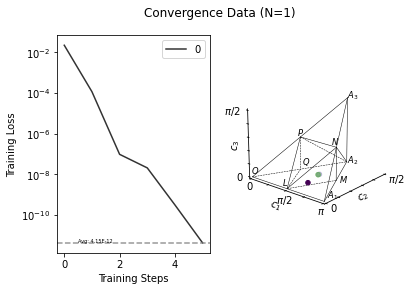

In [2]:
h = ConversionGainHamiltonian()
basis = HamiltonianTemplate(h=h)
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
sampler = GateSample(BerkeleyGate())
ret = optimizer.approximate_from_distribution(sampler=sampler)
optimizer_training_plot(*ret);
ret = optimizer.approximate_target_U(sampler._get_unitary())
print(ret.loss_result)
from numpy import pi
print([el/pi for el in ret.Xk])

In [3]:
# from hamiltonian import Simul1QGatesHamiltonian
# h = Simul1QGatesHamiltonian()
# basis = HamiltonianTemplate(h=h)
# objective = BasicCost()
# optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
# sampler = GateSample(BerkeleyGate())
# ret = optimizer.approximate_from_distribution(sampler=sampler)
# optimizer_training_plot(*ret);
# ret = optimizer.approximate_target_U(sampler._get_unitary())
# print(ret.loss_result)
# from numpy import pi
# print([el/pi for el in ret.Xk])